In [1]:
import pandas as pd
df=pd.read_csv(r"c:\DATA SCIENCE\Machine Learning\Data_Sets\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [2]:
df.isnull().sum()


age                 0
bought_insurance    0
dtype: int64

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [4]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


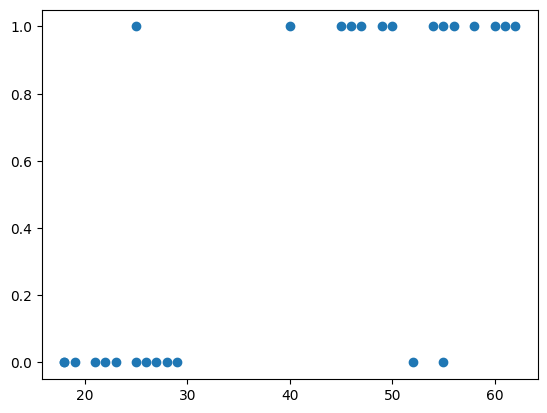

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df["age"],df["bought_insurance"])

In [6]:
x=df[["age"]]                    #here x value is in 2d array
y=df["bought_insurance"]         

In [7]:
#used for spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=45)
print(x_train.shape)
print(x_test.shape)

(21, 1)
(6, 1)


In [11]:
#building the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 1])

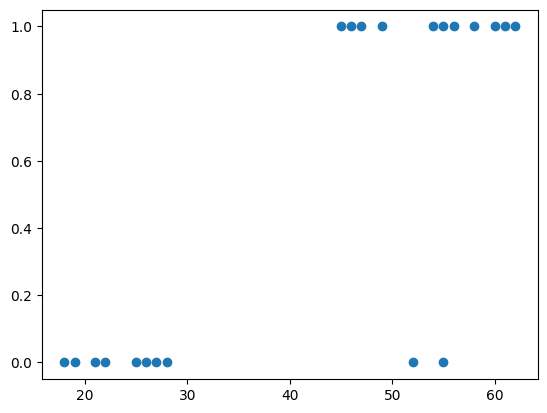

In [22]:
plt.scatter(x_train,y_train)


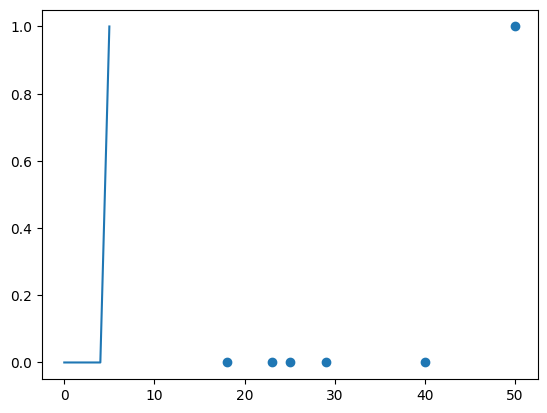

In [16]:
plt.scatter(x_test,prediction)
plt.plot(prediction)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))


0.6666666666666666
[[3 0]
 [2 1]]


In [79]:
#for getting the s shape curve
import numpy as np
age_range=np.linspace(df["age"].min(),df["age"].max(),300).reshape(-1,1)# reshaping into 2 d array
#print(age_range)            #this will be our x values
predict = model.predict_proba(age_range)[:, 1]      #probability estimation    
for x, y in zip(age_range, predict):#pairs each values
    print(f"x:{x[0]:.2f},y :{y:.2f}")
predict1 = model.predict(age_range)

x:18.00,y :0.01
x:18.15,y :0.01
x:18.29,y :0.01
x:18.44,y :0.01
x:18.59,y :0.01
x:18.74,y :0.01
x:18.88,y :0.02
x:19.03,y :0.02
x:19.18,y :0.02
x:19.32,y :0.02
x:19.47,y :0.02
x:19.62,y :0.02
x:19.77,y :0.02
x:19.91,y :0.02
x:20.06,y :0.02
x:20.21,y :0.02
x:20.35,y :0.02
x:20.50,y :0.02
x:20.65,y :0.02
x:20.80,y :0.02
x:20.94,y :0.02
x:21.09,y :0.02
x:21.24,y :0.02
x:21.38,y :0.02
x:21.53,y :0.02
x:21.68,y :0.02
x:21.83,y :0.02
x:21.97,y :0.03
x:22.12,y :0.03
x:22.27,y :0.03
x:22.41,y :0.03
x:22.56,y :0.03
x:22.71,y :0.03
x:22.86,y :0.03
x:23.00,y :0.03
x:23.15,y :0.03
x:23.30,y :0.03
x:23.44,y :0.03
x:23.59,y :0.03
x:23.74,y :0.03
x:23.89,y :0.04
x:24.03,y :0.04
x:24.18,y :0.04
x:24.33,y :0.04
x:24.47,y :0.04
x:24.62,y :0.04
x:24.77,y :0.04
x:24.92,y :0.04
x:25.06,y :0.04
x:25.21,y :0.04
x:25.36,y :0.04
x:25.51,y :0.05
x:25.65,y :0.05
x:25.80,y :0.05
x:25.95,y :0.05
x:26.09,y :0.05
x:26.24,y :0.05
x:26.39,y :0.05
x:26.54,y :0.05
x:26.68,y :0.06
x:26.83,y :0.06
x:26.98,y :0.06
x:27.12,

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


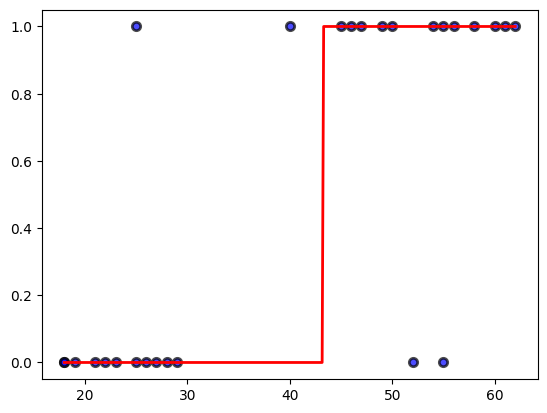

In [81]:
plt.scatter(df["age"],df["bought_insurance"],linewidth=2,color='blue', edgecolor='k', alpha=0.7, label='Actual Data')
plt.plot(age_range,predict1, color="red", linewidth=2, label='Logistic Regression Curve')

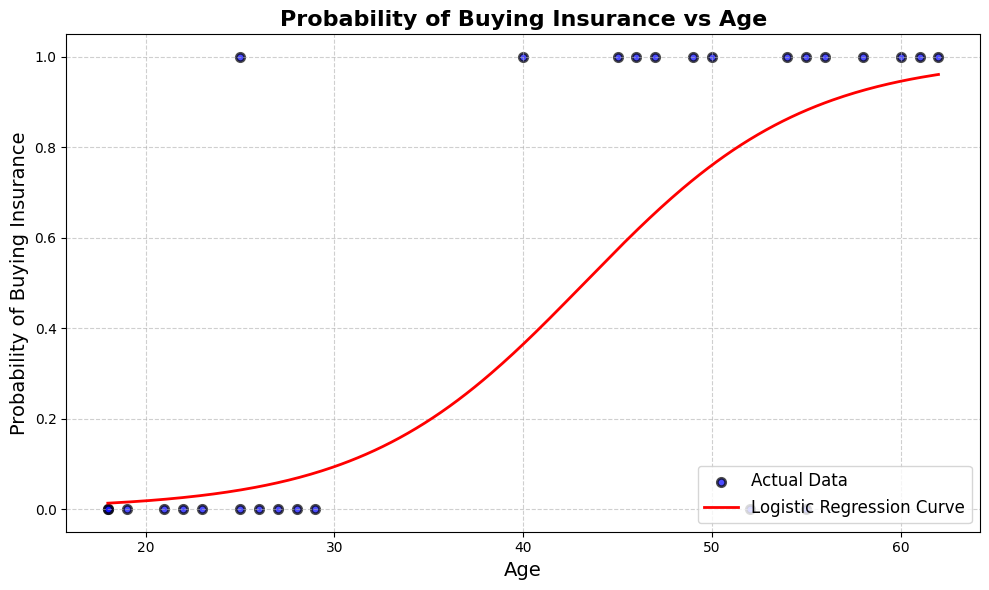

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(df["age"],df["bought_insurance"],linewidth=2,color='blue', edgecolor='k', alpha=0.7, label='Actual Data')
plt.plot(age_range,predict, color="red", linewidth=2, label='Logistic Regression Curve')
plt.title("Probability of Buying Insurance vs Age", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Probability of Buying Insurance", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()